In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline  

In [2]:
data = pd.read_csv('../Data/clean_data.csv')
data.head()

,brand_model,brand,model,mileage,fuel,gear,offer_type,price,hp,year,age
0,Volkswagen Golf,Volkswagen,Golf,92800,Gasoline,Manual,Used,6877,122.0,2011,12
1,Renault Megane,Renault,Megane,96200,Gasoline,Manual,Used,6950,110.0,2011,12
2,Peugeot 308,Peugeot,308,156000,Gasoline,Manual,Used,6950,156.0,2011,12
3,Toyota Auris,Toyota,Auris,147000,Electric,Automatic,Used,6950,99.0,2011,12
4,Renault Scenic,Renault,Scenic,91894,Diesel,Manual,Used,6970,131.0,2011,12


#### Exploring Outliers in the dataset

In [3]:
data.select_dtypes(include=np.number)


,mileage,price,hp,year,age
0,92800,6877,122.0,2011,12
1,96200,6950,110.0,2011,12
2,156000,6950,156.0,2011,12
3,147000,6950,99.0,2011,12
4,91894,6970,131.0,2011,12
...,...,...,...,...,...
32196,10,12340,72.0,2021,2
32197,99,12490,71.0,2021,2
32198,550,12805,69.0,2021,2
32199,837,12805,69.0,2021,2


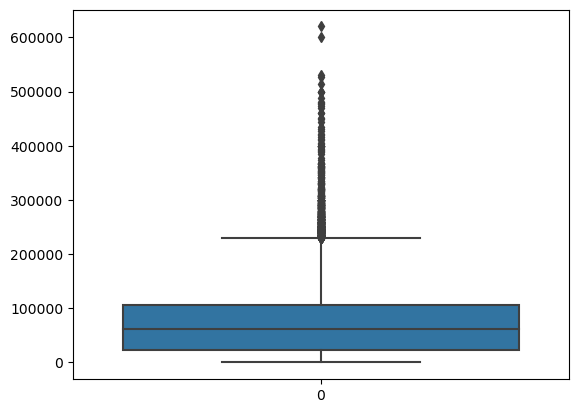

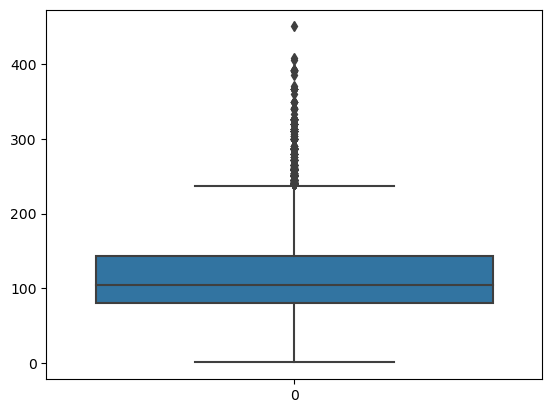

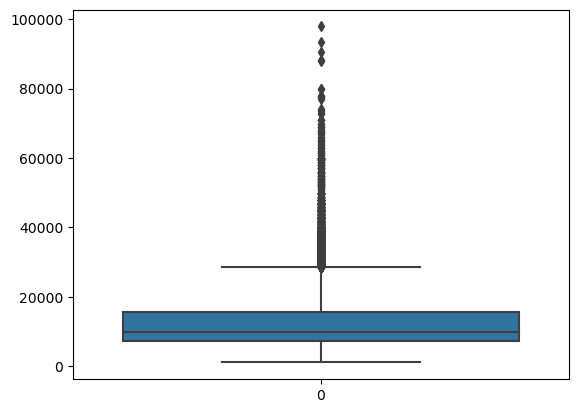

In [4]:
for column in ["mileage","hp","price"]:
    sns.boxplot(data[column])
    plt.show()

#### Removing outliers

+ Column Mileage

In [5]:
data.describe()

,mileage,price,hp,year,age
count,32201.000000,32201.000000,32201.000000,32201.000000,32201.000000
mean,72949.453433,13122.826589,116.762771,2015.853576,7.146424
std,60658.517378,9002.856835,47.044138,3.045252,3.045252
min,1.000000,1100.000000,1.000000,2011.000000,2.000000
25%,23639.000000,7190.000000,80.000000,2013.000000,5.000000
50%,62590.000000,9999.000000,105.000000,2016.000000,7.000000
75%,106100.000000,15700.000000,143.000000,2018.000000,10.000000
max,620000.000000,97880.000000,450.000000,2021.000000,12.000000


In [6]:
Q1_m = data['mileage'].quantile(0.25)
Q3_m = data['mileage'].quantile(0.75)
IQR_m=Q3_m - Q1_m
print(IQR_m)

82461.0


In [7]:
Q1_m

23639.0

In [8]:
Q3_m

106100.0

In [9]:
data.shape

(32201, 11)

In [10]:
data=data[~((data['mileage']<(Q1_m-1.5*IQR_m)) | (data['mileage']>(Q3_m+1.5*IQR_m)))]

In [11]:
data.shape

(31613, 11)

+ Column [hp]

In [12]:
Q1_h = data['hp'].quantile(0.27)
Q3_h = data['hp'].quantile(0.75)
IQR_h=Q3_h - Q1_h
print(IQR_h)

61.0


In [13]:
data.shape

(31613, 11)

In [14]:
data=data[~((data['hp']<(Q1_h-1.5*IQR_h)) | (data['hp']>(Q3_h+1.5*IQR_h)))]
data.shape

(30674, 11)

Column [price]

In [15]:
Q1_p = data['price'].quantile(0.25)
Q3_p = data['price'].quantile(0.75)
IQR_p=Q3_p - Q1_p
print(IQR_p)

7880.0


In [16]:
data.shape

(30674, 11)

In [17]:
data=data[~((data['price']<(Q1_p-1.5*IQR_p)) | (data['price']>(Q3_p+1.5*IQR_p)))]
data.shape

(28446, 11)

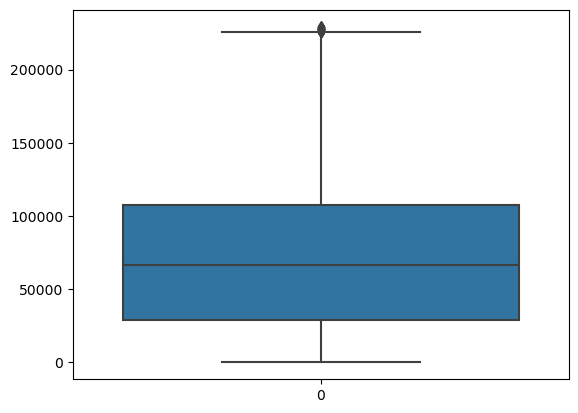

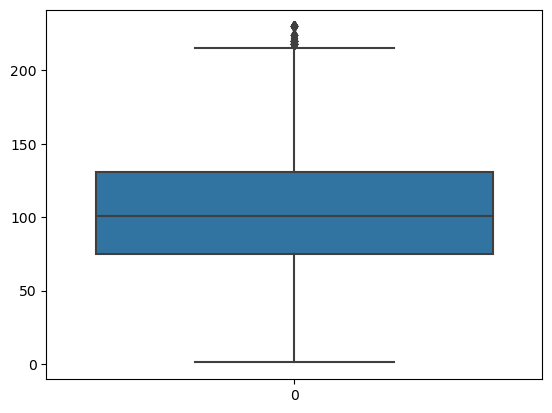

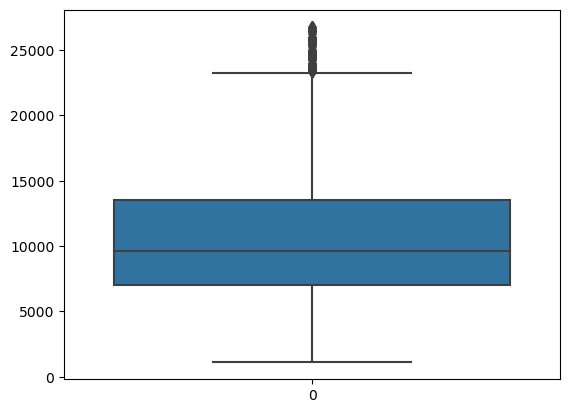

In [18]:
#after removing outliers
for column in ["mileage","hp","price"]:
    sns.boxplot(data[column])
    plt.show()

In [19]:
data.head()

,brand_model,brand,model,mileage,fuel,gear,offer_type,price,hp,year,age
0,Volkswagen Golf,Volkswagen,Golf,92800,Gasoline,Manual,Used,6877,122.0,2011,12
1,Renault Megane,Renault,Megane,96200,Gasoline,Manual,Used,6950,110.0,2011,12
2,Peugeot 308,Peugeot,308,156000,Gasoline,Manual,Used,6950,156.0,2011,12
3,Toyota Auris,Toyota,Auris,147000,Electric,Automatic,Used,6950,99.0,2011,12
4,Renault Scenic,Renault,Scenic,91894,Diesel,Manual,Used,6970,131.0,2011,12


In [20]:
data.to_csv('../Data/clean_data_outliers.csv',index=False)